## Assignment 1
#### Name: Akash Shivaji Varude
#### Roll Number: 231110006


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def Travel_time(satellite_positions, user_pos, speed):              #to calculate time required to travel the signal from each sattelite
    travel_times = []
    for i,sat_pos in enumerate(satellite_positions, start=1):
        distance = np.linalg.norm(user_pos - sat_pos)               #calculating euclidean distance bet sattelite and user position
        travel_time = distance / speed
        travel_times.append(travel_time)                            #storing each time req from each sattelite
    return travel_times

In [3]:
def trilateration(sattelite_positions, speed, travel_times):        #Function to calculate user position
    distances=[]
    for time in travel_times:                                       #Here I am using previously calculated times to calculate distances
        distances.append(speed*time)

    sp = sattelite_positions.copy()
    #Here I am creating row wise matrix A using ppt formula
    A0=np.empty(3)
    for i, (val1, val2) in enumerate(zip([sp[1][0], sp[1][1], sp[1][2]], [sp[0][0], sp[0][1], sp[0][2]])):
        A0[i] = 2 * (val1 - val2)
    A1=np.empty(3)
    for i, (val1, val2) in enumerate(zip([sp[2][0], sp[2][1], sp[2][2]], [sp[1][0], sp[1][1], sp[1][2]])):
        A1[i] = 2 * (val1 - val2)
    A2=np.empty(3)
    for i, (val1, val2) in enumerate(zip([sp[3][0], sp[3][1], sp[3][2]], [sp[2][0], sp[2][1], sp[2][2]])):
        A2[i] = 2 * (val1 - val2)
    A3=np.empty(3)
    for i, (val1, val2) in enumerate(zip([sp[4][0], sp[4][1], sp[4][2]], [sp[3][0], sp[3][1], sp[3][2]])):
        A3[i] = 2 * (val1 - val2)
    #Now combining it to make a matrix
    A = np.vstack((A0, A1, A2, A3))
    #Here I am calculating Matrix B using formula mentioned in ppt
    B=np.empty(4)
    for i in range(4):
        B[i]=(distances[i]**2 - distances[i+1]**2)-(sp[i][0]**2-sp[i+1][0]**2)-(sp[i][1]**2-sp[i+1][1]**2)-(sp[i][2]**2-sp[i+1][2]**2)

    #Finding Solution of AX=B  by using formula X=(((A^T)A)^-1)(A^T)B
    solution= np.matmul(np.linalg.inv(np.matmul(A.T,A)),np.matmul(A.T,B))
    return (solution)

In [4]:
def calculate_Norm(NoErrorUserPos, ErrorUserPos):           #Created a function just to calculate inaccuracies of calculated position vs actual user position
    inaccuracy=math.sqrt((NoErrorUserPos[0]-ErrorUserPos[0])**2+(NoErrorUserPos[1]-ErrorUserPos[1])**2+(NoErrorUserPos[2]-ErrorUserPos[2])**2)
    return(inaccuracy)

In [5]:
speed = 300000000  # Speed of light in mtr per second

satellite_positions = np.array([
        np.array([40000000, 50000000, 66660000]),
        np.array([-80000000, 25000000, -44000000]),
        np.array([65000000, 98000000, 10450000]),
        np.array([20000000, -43000000, -66060000]),
        np.array([55000000, 35000000, 42300000])
    ],dtype='float64')    #sattelite positions in meters
print("Sattelite Positions are:\n",satellite_positions,"\n")
user_pos = np.array([100, 100, 100])

Sattelite Positions are:
 [[ 40000000.  50000000.  66660000.]
 [-80000000.  25000000. -44000000.]
 [ 65000000.  98000000.  10450000.]
 [ 20000000. -43000000. -66060000.]
 [ 55000000.  35000000.  42300000.]] 



### Assignment Task 1

In [6]:
travel_times=[]
travel_times=Travel_time(satellite_positions, user_pos, speed)
print("Task 1:\n travel Times are:",travel_times,"\n")

Task 1:
 travel Times are: [0.30810395554513015, 0.3155422105947158, 0.39353339276680904, 0.27106664641805955, 0.2590423290170075] 



### Assignment Task 2

In [7]:
NoErrorUserPos=[]
NoErrorUserPos=trilateration(satellite_positions, speed, travel_times)
print("User Postion(No Error Introduced): ",NoErrorUserPos)
inaccuracy=calculate_Norm(user_pos, NoErrorUserPos)   #find inaccuracy between actual user pos vs calculated user pos(without including time error)
print("inaccuracy in position: ",inaccuracy)

User Postion(No Error Introduced):  [ 99.99999999  99.99999997 100.00000002]
inaccuracy in position:  3.573249173363488e-08


### Assignment Task 3

In [8]:
error_Traveltimes=np.array(travel_times)
#generating some random error from 0 to 1 and dividing it by 10**8 so that error is not very large
rand_error=np.random.rand()/10**8
error_Traveltimes=error_Traveltimes+rand_error  #adding error into errored travel time array
ErrorUserPos=trilateration(satellite_positions, speed, error_Traveltimes)
print("\nTask 3:\nUser Postions: ",ErrorUserPos)

inaccuracy=calculate_Norm(user_pos, ErrorUserPos)   #finding inaccuracy between actual user pos vs calculated user pos(including time error)
print("inaccuracy in position: ",inaccuracy)


Task 3:
User Postions:  [ 99.8919217   99.68387106 100.24488062]
inaccuracy in position:  0.41422813098521255


### Assignment Task 4

In [9]:
travel_times=np.array(travel_times)
err_list=np.array([np.random.rand()/10**8 for i in range(20)], dtype='float64')       #created numpy array to store randomly generated errors
err_list.sort()                         #sorting errors in increasing orders


Avarage Inaccuracy : 0.6564644029333692


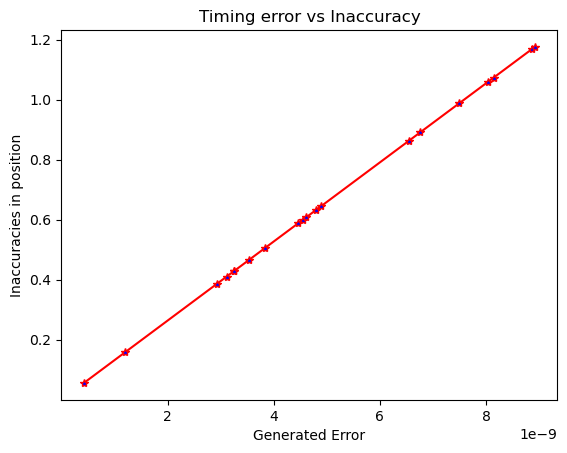

In [10]:
inaccuracy_list=[]                      #list to store inaccuracies in position for corresponding errors
for i in range(20):
    errored_Traveltimes=travel_times+err_list[i]        #adding error to time
    ErroredUserPos=trilateration(satellite_positions, speed, errored_Traveltimes)  #calculating user postion (for errored time)
    inaccuracy=calculate_Norm(user_pos, ErroredUserPos)
    inaccuracy_list.append(inaccuracy)          #storing inaccuracy in inaccuracy list
#print("\ninaccuracies generated due to errors",inaccuracy_list,"\n") #just printing all inaccuracies
print("\nAvarage Inaccuracy :",np.average(inaccuracy_list))
np.array(inaccuracy_list)                       #converting it to numpy array
plt.plot(err_list,inaccuracy_list, color ="red",marker='*',markerfacecolor='blue')
plt.xlabel("Generated Error")
plt.ylabel("Inaccuracies in position")
plt.title("Timing error vs Inaccuracy")
plt.show()